# A股市场明细收集

## easyquotation使用示例

In [1]:
import easyquotation
import pandas as pd
import os

In [2]:
quotation = easyquotation.use('sina') # 新浪 ['sina'] 腾讯 ['tencent', 'qq'] 

In [3]:
#获取所有股票行情
# prefix 参数指定返回的行情字典中的股票代码 key 是否带 sz/sh 前缀
market_snapshot = quotation.market_snapshot(prefix=True) 

In [4]:
type(market_snapshot)

dict

In [5]:
market_df = pd.DataFrame(market_snapshot)

```{'sh000159': {'name': '国际实业', # 股票名
  'buy': 8.87, # 竞买价
  'sell': 8.88, # 竞卖价
  'now': 8.88, # 现价
  'open': 8.99, # 开盘价
  'close': 8.96, # 昨日收盘价
  'high': 9.15, # 今日最高价
  'low': 8.83, # 今日最低价
  'turnover': 22545048, # 交易股数
  'volume': 202704887.74， # 交易金额
  'ask1': 8.88, # 卖一价
  'ask1_volume': 111900, # 卖一量
  'ask2': 8.89,
  'ask2_volume': 54700,
  'bid1': 8.87, # 买一价
  'bid1_volume': 21800, # 买一量
  ...
  'bid2': 8.86, 
  'bid2_volume': 78400,
  'date': '2016-02-19',
  'time': '14:30:00',
  ...},
  ......```

In [6]:
market_df = market_df.T

In [7]:
market_df.head()

,name,open,close,now,high,low,buy,sell,turnover,volume,...,ask2_volume,ask2,ask3_volume,ask3,ask4_volume,ask4,ask5_volume,ask5,date,time
sz000001,平安银行,19,18.64,19.4,19.74,19,19.4,19.41,145533835,2.82931e+09,...,216700,19.42,106400,19.43,93800,19.44,258200,19.45,2021-10-11,15:00:03
sz000002,万科Ａ,21.28,21.24,22.1,22.51,21.25,22.1,22.11,126899398,2.80463e+09,...,141200,22.12,189800,22.13,107100,22.14,143400,22.15,2021-10-11,15:00:03
sz000003,PT金田A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2021-10-07,11:45:01
sz000004,国华网安,19.15,19.16,19.73,19.89,18.84,19.73,19.74,3439110,6.67431e+07,...,5600,19.75,3300,19.76,500,19.77,7400,19.78,2021-10-11,15:00:03
sz000005,ST星源,2.17,2.17,2.23,2.25,2.16,2.22,2.23,11837718,2.61796e+07,...,429900,2.24,462000,2.25,335100,2.26,484300,2.27,2021-10-11,15:00:03


In [8]:
def get_increase(arrLike, close, now):
    if arrLike[close] > 0:
        return round(((arrLike[now]-arrLike[close]) / arrLike[close]) * 100, 2)
    else:
        return 0

In [9]:
market_df['increase'] = market_df.apply(get_increase, axis=1, args=['close', 'now'])

In [10]:
market_df.head()

,name,open,close,now,high,low,buy,sell,turnover,volume,...,ask2,ask3_volume,ask3,ask4_volume,ask4,ask5_volume,ask5,date,time,increase
sz000001,平安银行,19,18.64,19.4,19.74,19,19.4,19.41,145533835,2.82931e+09,...,19.42,106400,19.43,93800,19.44,258200,19.45,2021-10-11,15:00:03,4.08
sz000002,万科Ａ,21.28,21.24,22.1,22.51,21.25,22.1,22.11,126899398,2.80463e+09,...,22.12,189800,22.13,107100,22.14,143400,22.15,2021-10-11,15:00:03,4.05
sz000003,PT金田A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2021-10-07,11:45:01,0.00
sz000004,国华网安,19.15,19.16,19.73,19.89,18.84,19.73,19.74,3439110,6.67431e+07,...,19.75,3300,19.76,500,19.77,7400,19.78,2021-10-11,15:00:03,2.97
sz000005,ST星源,2.17,2.17,2.23,2.25,2.16,2.22,2.23,11837718,2.61796e+07,...,2.24,462000,2.25,335100,2.26,484300,2.27,2021-10-11,15:00:03,2.76


In [11]:
market_df[(market_df['increase'] != -100) & (market_df['date'] == '2021-03-02')]['increase'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: increase, dtype: float64

In [12]:
market_df['now'].describe()

count     5419.0
unique    3306.0
top          0.0
freq       159.0
Name: now, dtype: float64

In [13]:
stocks_folder = './excel/stocks/'
if not os.path.exists(stocks_folder):
    os.makedirs(stocks_folder)

In [14]:
import time
try:
    excel_name = 'China_Stocks_Trade_{0}.xlsx'.format(
        time.strftime('%Y%m%d%H%M%S', time.localtime(time.time())))
    stocks_folder = './excel/stocks/'
    if not os.path.exists(stocks_folder):
        os.makedirs(stocks_folder)
    excel_filepath = os.path.join(stocks_folder,
                                  excel_name)
    write = pd.ExcelWriter(excel_filepath)
    market_df.to_excel(write,
                       sheet_name='details',
                       index=True,
                       encoding='utf-8')
    write.save()
except Exception as e:
    print(e)

## tushare使用示例

In [1]:
import tushare as ts
import os
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from pyecharts import options as opts
from pyecharts.charts import Line, Kline
%matplotlib inline

In [2]:
#设置行不限制数量
pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns',None)

#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [3]:
# 支持中文显示
rc = {'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', font='SimHei', rc=rc)

In [7]:
profit_data = ts.get_profit_data(2021,1)

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
[Getting data:]###########################################################################

In [8]:
profit_data.head()

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,000670,*ST盈方,45.63,1.76,9.0691,12.0108,NaN,680.0358,NaN
1,300344,立方数科,44.92,42.97,30.1835,43.3350,0.0873,100.8473,0.2032
2,688068,热景生物,44.73,48.98,66.1425,601.3246,9.6681,1227.5591,19.7368
3,600331,宏达股份,42.29,5.94,9.5629,36.2608,0.0178,610.0164,0.3002
4,000422,湖北宜化,39.38,5.96,16.4714,212.3212,0.2364,3561.8553,3.9670


In [9]:
len(profit_data)

4475

```
code,代码
name,名称
roe,净资产收益率(%)
net_profit_ratio,净利率(%)
gross_profit_rate,毛利率(%)
net_profits,净利润(万元)
esp,每股收益
business_income,营业收入(百万元)
bips,每股主营业务收入(元)
```

In [10]:
import time
try:
    excel_name = 'China_Stocks_Profit_2020_4_{0}.xlsx'.format(
        time.strftime('%Y%m%d%H%M%S', time.localtime(time.time())))
    stocks_folder = './excel/stocks/'
    if not os.path.exists(stocks_folder):
        os.makedirs(stocks_folder)
    excel_filepath = os.path.join(stocks_folder,
                                  excel_name)
    write = pd.ExcelWriter(excel_filepath)
    profit_data.to_excel(write,
                        sheet_name='details',
                        index=True,
                        encoding='utf-8')
    write.save()
except Exception as e:
    print(e)

### 获取当前所有正常上市交易的股票列表

In [4]:
pro = ts.pro_api('31540a474cc888b4c8c280ed0621a147b718e78ee485f82c0c6a1d90')

In [5]:
stock_info = pro.stock_basic(exchange='', list_status='L')

In [6]:
stock_info.head()

,ts_code,symbol,name,area,industry,market,list_date
0,000001.SZ,000001,平安银行,深圳,银行,主板,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,主板,19910129
2,000004.SZ,000004,国华网安,深圳,软件服务,主板,19910114
3,000005.SZ,000005,ST星源,深圳,环境保护,主板,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,主板,19920427


In [7]:
stocks_folder = './excel/stocks/tushare/'
excel_name = '中国A股股票列表_{0}.xlsx'.format(time.strftime('%Y%m%d%H%M%S', time.localtime(time.time())))

In [8]:
def export_excel(folder: str, file_name: str, data_dict: dict):
    import time
    try:
        if not os.path.exists(folder):
            os.makedirs(folder)
        excel_filepath = os.path.join(folder,
                                      file_name)
        write = pd.ExcelWriter(excel_filepath)
        for sheet_name, data_df in data_dict.items():
            stock_info.to_excel(write,
                                sheet_name=sheet_name,
                                index=True,
                                encoding='utf-8')
        write.save()
    except Exception as e:
        print(e)

In [9]:
export_excel(stocks_folder, excel_name, {'股票列表': stock_info})

In [10]:
pro.hsgt_top10(trade_date='20211011', market_type='3')

,trade_date,ts_code,name,close,change,rank,market_type,amount,net_amount,buy,sell
0,20211011,000333.SZ,美的集团,71.08,-1.9586,9,3,7.276095e+08,294277503.0,510943501.0,2.166660e+08
1,20211011,000568.SZ,泸州老窖,224.50,-0.3683,8,3,8.497565e+08,-44168466.0,402794008.0,4.469625e+08
2,20211011,000858.SZ,五粮液,227.80,-0.1840,1,3,1.586446e+09,-640781908.0,472832257.0,1.113614e+09
3,20211011,002594.SZ,比亚迪,255.75,1.0870,2,3,1.266344e+09,-193933726.0,536204919.0,7.301386e+08
4,20211011,002812.SZ,恩捷股份,254.00,0.7497,3,3,1.106666e+09,-378558774.0,364053667.0,7.426124e+08
5,20211011,300059.SZ,东方财富,34.41,-0.5204,6,3,9.595013e+08,-440328346.0,259586485.0,6.999148e+08
6,20211011,300124.SZ,汇川技术,64.01,-0.2338,10,3,6.988411e+08,51179811.0,375010465.0,3.238307e+08
7,20211011,300274.SZ,阳光电源,139.01,-7.4501,4,3,1.077672e+09,-145884062.0,465893751.0,6.117778e+08
8,20211011,300750.SZ,宁德时代,521.00,-2.4345,5,3,1.047932e+09,-126322852.0,460804415.0,5.871273e+08
9,20211011,300760.SZ,迈瑞医疗,365.88,-2.7820,7,3,8.913448e+08,102760852.0,497052819.0,3.942920e+08


### 获取当天交易数据

In [11]:
daily_data = pro.daily()

In [12]:
daily_data.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,689009.SH,20211011,80.88,87.79,80.49,85.00,80.58,4.42,5.4852,26175.96,223069.418
1,688981.SH,20211011,56.00,56.30,55.31,55.41,55.77,-0.36,-0.6455,203860.40,1136273.712
2,688819.SH,20211011,43.84,44.09,43.39,43.89,43.83,0.06,0.1369,15014.75,65807.258
3,688800.SH,20211011,73.75,73.87,69.89,71.79,73.27,-1.48,-2.0199,6268.36,44404.050
4,688799.SH,20211011,38.97,39.15,38.60,38.82,38.64,0.18,0.4658,2695.35,10476.144


将股票基本信息加入到当天交易信息中

In [13]:
result = pd.merge(daily_data, stock_info, how = 'left', on=['ts_code', 'ts_code'])

In [14]:
result.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,symbol,name,area,industry,market,list_date
0,689009.SH,20211011,80.88,87.79,80.49,85.00,80.58,4.42,5.4852,26175.96,223069.418,689009,九号公司-WD,北京,摩托车,CDR,20201029
1,688981.SH,20211011,56.00,56.30,55.31,55.41,55.77,-0.36,-0.6455,203860.40,1136273.712,688981,中芯国际,上海,半导体,科创板,20200716
2,688819.SH,20211011,43.84,44.09,43.39,43.89,43.83,0.06,0.1369,15014.75,65807.258,688819,天能股份,浙江,电气设备,科创板,20210118
3,688800.SH,20211011,73.75,73.87,69.89,71.79,73.27,-1.48,-2.0199,6268.36,44404.050,688800,瑞可达,江苏,元器件,科创板,20210722
4,688799.SH,20211011,38.97,39.15,38.60,38.82,38.64,0.18,0.4658,2695.35,10476.144,688799,华纳药厂,湖南,化学制药,科创板,20210713


整理Data Frame列表顺序

In [15]:
easy_read_df = result[['trade_date', 'ts_code', 'symbol', 'name', 'industry', 'pct_chg', 'open', 'high', 'low', 'close', 'change', 'vol', 'amount']]

In [16]:
easy_read_df.head()

,trade_date,ts_code,symbol,name,industry,pct_chg,open,high,low,close,change,vol,amount
0,20211011,689009.SH,689009,九号公司-WD,摩托车,5.4852,80.88,87.79,80.49,85.00,4.42,26175.96,223069.418
1,20211011,688981.SH,688981,中芯国际,半导体,-0.6455,56.00,56.30,55.31,55.41,-0.36,203860.40,1136273.712
2,20211011,688819.SH,688819,天能股份,电气设备,0.1369,43.84,44.09,43.39,43.89,0.06,15014.75,65807.258
3,20211011,688800.SH,688800,瑞可达,元器件,-2.0199,73.75,73.87,69.89,71.79,-1.48,6268.36,44404.050
4,20211011,688799.SH,688799,华纳药厂,化学制药,0.4658,38.97,39.15,38.60,38.82,0.18,2695.35,10476.144


获取当天股价最高的股票

In [17]:
easy_read_df[easy_read_df['close'] == max(easy_read_df['close'])]

,trade_date,ts_code,symbol,name,industry,pct_chg,open,high,low,close,change,vol,amount
1566,20211011,600519.SH,600519,贵州茅台,白酒,1.496,1839.51,1889.9,1831.01,1867.12,27.52,37675.57,7040475.327


获取当天成交额最多的股票

In [18]:
easy_read_df[easy_read_df['amount'] == max(easy_read_df['amount'])]

,trade_date,ts_code,symbol,name,industry,pct_chg,open,high,low,close,change,vol,amount
1099,20211011,601318.SH,601318,中国平安,保险,1.2284,52.1,53.39,51.94,52.74,0.64,1504499.54,7944560.509


获取当天涨幅超过5%的股票

In [19]:
up_df = easy_read_df[easy_read_df['pct_chg'] >= 5].sort_values(by=['pct_chg', 'symbol'], 
                                                               ascending=[False, True]).reset_index()

大涨股票所属板块数目排序

In [20]:
up_market_count = pd.DataFrame(up_df['industry'].value_counts())

In [21]:
up_market_count.head(10)

,industry
通信设备,15
汽车配件,11
元器件,11
互联网,10
煤炭开采,9
软件服务,9
航空,8
食品,7
电气设备,7
化工原料,7


绘制为散点图

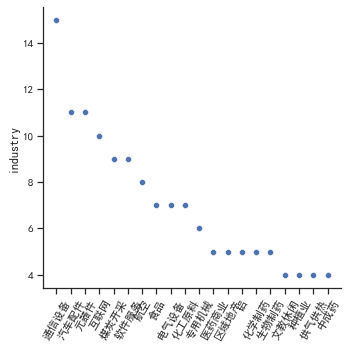

In [22]:
sns.relplot(x=up_market_count.index[0:20], y='industry', data=up_market_count.head(20))
# 旋转X轴文本为90度
plt.xticks(plt.xticks()[0], up_market_count.index, rotation=60)
plt.tight_layout()
plt.show()

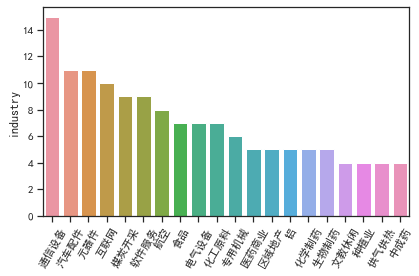

In [23]:
sns.barplot(x=up_market_count.index[0:20], y='industry', data=up_market_count.head(20))
# 旋转X轴文本为90度
plt.xticks(plt.xticks()[0], up_market_count.index, rotation=60)
plt.tight_layout()
plt.show()

获取当天跌幅超过5%的股票

In [24]:
down_df = easy_read_df[easy_read_df['pct_chg'] <= -5].sort_values(by=['pct_chg', 'symbol'], 
                                                                  ascending=[True, True]).reset_index()

大跌股票所属板块数目排序

In [25]:
down_market_count = pd.DataFrame(down_df['industry'].value_counts())

In [26]:
down_market_count.head(10)

,industry
电气设备,46
环境保护,24
化工原料,14
供气供热,11
专用机械,11
水务,10
电器仪表,9
化学制药,9
水力发电,8
机械基件,7


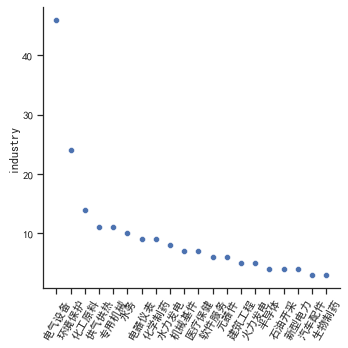

In [27]:
sns.relplot(x=down_market_count.index[0:20], y='industry', data=down_market_count.head(20))
# 旋转X轴文本为90度
plt.xticks(plt.xticks()[0], down_market_count.index, rotation=60)
plt.tight_layout()
plt.show()

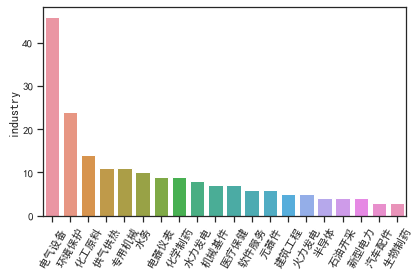

In [28]:
sns.barplot(x=down_market_count.index[0:20], y='industry', data=down_market_count.head(20))
# 旋转X轴文本为90度
plt.xticks(plt.xticks()[0], down_market_count.index, rotation=60)
plt.tight_layout()
plt.show()

对所有股票当天交易数据做统计，包括均值，方差，最小值，25,50,75分位以及最大值

In [29]:
easy_read_df.describe()

,pct_chg,open,high,low,close,change,vol,amount
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03
mean,-0.064772,29.776708,30.485824,28.950722,29.548738,-0.144970,1.561551e+05,2.083454e+05
std,3.085635,61.051053,62.690209,59.118656,60.351507,2.584002,4.385489e+05,4.765156e+05
min,-15.929200,1.460000,1.460000,1.430000,1.440000,-67.900000,7.032900e+02,1.368836e+03
25%,-1.360500,7.050000,7.140000,6.860000,7.000000,-0.170000,1.418813e+04,2.300318e+04
50%,0.000000,13.535000,13.795000,13.230000,13.490000,0.000000,4.575900e+04,6.101911e+04
75%,1.174050,28.962500,29.667500,28.400000,28.900000,0.160000,1.374768e+05,1.861084e+05
max,51.290300,1839.510000,1889.900000,1831.010000,1867.120000,36.840000,1.546080e+07,7.944561e+06


列出表格中所有列

In [30]:
list(easy_read_df)

['trade_date',
 'ts_code',
 'symbol',
 'name',
 'industry',
 'pct_chg',
 'open',
 'high',
 'low',
 'close',
 'change',
 'vol',
 'amount']

In [31]:
final_result = easy_read_df.rename(columns={'trade_date': '交易日期', 
                             'ts_code': '系统编码', 
                             'symbol': '股票代码', 
                             'name': '股票名称',
                            'industry': '所属行业',
                            'pct_chg': '涨跌幅',
                            'open': '今开',
                            'high': '最高',
                            'low': '最低',
                            'close': '今收',
                            'change': '价格差',
                            'vol': '成交量',
                            'amount': '成交额'})

In [32]:
final_result.head()

,交易日期,系统编码,股票代码,股票名称,所属行业,涨跌幅,今开,最高,最低,今收,价格差,成交量,成交额
0,20211011,689009.SH,689009,九号公司-WD,摩托车,5.4852,80.88,87.79,80.49,85.00,4.42,26175.96,223069.418
1,20211011,688981.SH,688981,中芯国际,半导体,-0.6455,56.00,56.30,55.31,55.41,-0.36,203860.40,1136273.712
2,20211011,688819.SH,688819,天能股份,电气设备,0.1369,43.84,44.09,43.39,43.89,0.06,15014.75,65807.258
3,20211011,688800.SH,688800,瑞可达,元器件,-2.0199,73.75,73.87,69.89,71.79,-1.48,6268.36,44404.050
4,20211011,688799.SH,688799,华纳药厂,化学制药,0.4658,38.97,39.15,38.60,38.82,0.18,2695.35,10476.144


In [33]:
final_result.sort_values(by=['所属行业', '涨跌幅'], ascending=[True, False]).reset_index().head()

,index,交易日期,系统编码,股票代码,股票名称,所属行业,涨跌幅,今开,最高,最低,今收,价格差,成交量,成交额
0,2244,20211011,300793.SZ,300793,佳禾智能,IT设备,5.2716,18.80,20.18,18.64,19.77,0.99,111707.67,219745.656
1,1381,20211011,600734.SH,600734,*ST实达,IT设备,4.8507,2.67,2.81,2.67,2.81,0.13,129134.65,35781.876
2,2656,20211011,300367.SZ,300367,ST网力,IT设备,4.7393,2.11,2.25,2.10,2.21,0.10,210594.60,45788.746
3,4511,20211008,688696.SH,688696,极米科技,IT设备,3.5568,456.00,467.65,450.51,464.97,15.97,2710.62,125424.921
4,3670,20211011,002351.SZ,002351,漫步者,IT设备,2.9461,11.94,12.33,11.81,12.23,0.35,69084.93,84043.042


查看特定代码股票的行情趋势，如300750：宁德时代

In [34]:
ts_code = '300750.SZ'

In [35]:
df = pro.daily(ts_code=ts_code)

In [36]:
df = df.sort_values(by=['trade_date'], ascending=[True]).reset_index(drop=True)

In [37]:
df.head(10)

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,300750.SZ,20180611,30.17,36.20,30.17,36.20,25.14,11.06,43.99,788.29,2845.471
1,300750.SZ,20180612,39.82,39.82,39.82,39.82,36.20,3.62,10.00,265.79,1058.375
2,300750.SZ,20180613,43.80,43.80,43.80,43.80,39.82,3.98,10.00,450.30,1972.314
3,300750.SZ,20180614,48.18,48.18,48.18,48.18,43.80,4.38,10.00,742.67,3578.184
4,300750.SZ,20180615,53.00,53.00,53.00,53.00,48.18,4.82,10.00,2565.10,13595.030
5,300750.SZ,20180619,58.30,58.30,58.30,58.30,53.00,5.30,10.00,11174.28,65146.052
6,300750.SZ,20180620,64.13,64.13,64.13,64.13,58.30,5.83,10.00,13103.82,84034.797
7,300750.SZ,20180621,70.54,70.54,70.54,70.54,64.13,6.41,10.00,12316.60,86881.296
8,300750.SZ,20180622,72.00,72.71,63.49,66.55,70.54,-3.99,-5.66,1281705.99,8599728.955
9,300750.SZ,20180625,68.20,71.60,67.22,69.19,66.55,2.64,3.97,699819.99,4868406.844


In [38]:
# 将trade_date转换为字符串
df['trade_date'] = df['trade_date'].astype("str")

In [39]:
df = df.rename(columns={'pct_chg': '涨跌幅%',
                            'open': '今开',
                            'high': '最高',
                            'low': '最低',
                            'close': '今收',
                            'change': '涨跌额',
                            'vol': '成交量',
                            'amount': '成交额'})

In [40]:
ochl = df[['今开', '今收', '最低', '最高', '涨跌幅%', '涨跌额', '成交量', '成交额']]

In [41]:
ochl.head()

,今开,今收,最低,最高,涨跌幅%,涨跌额,成交量,成交额
0,30.17,36.20,30.17,36.20,43.99,11.06,788.29,2845.471
1,39.82,39.82,39.82,39.82,10.00,3.62,265.79,1058.375
2,43.80,43.80,43.80,43.80,10.00,3.98,450.30,1972.314
3,48.18,48.18,48.18,48.18,10.00,4.38,742.67,3578.184
4,53.00,53.00,53.00,53.00,10.00,4.82,2565.10,13595.030


In [42]:
ochl_tolist = [ochl.iloc[i].tolist() for i in range(len(ochl))]

In [43]:
kline = Kline()

In [44]:
kline.add_xaxis(list(df['trade_date']))

In [45]:
kline.add_yaxis(ts_code, ochl_tolist, 
                itemstyle_opts=opts.ItemStyleOpts(color="#ec0000",
                                                  color0="#00da3c",
                                                  border_color="#8A0000",
                                                  border_color0="#008F28"),
               markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="max", 
                                                                       value_dim="close"),
                                                    opts.MarkLineItem(type_="min", 
                                                                       value_dim="close")]
                                              ))

In [48]:
# kline.set_global_opts(xaxis_opts=opts.AxisOpts(is_scale=True),
#                       yaxis_opts=opts.AxisOpts(is_scale=True,
#                                                splitarea_opts=
#                                                opts.SplitAreaOpts(is_show=True,
#                                                                   areastyle_opts=opts.AreaStyleOpts(opacity=1))),
#                       datazoom_opts=[opts.DataZoomOpts(type_="inside")],
#                      title_opts=opts.TitleOpts('宁德时代K线图'))

kline.set_global_opts(xaxis_opts=opts.AxisOpts(is_scale=True),
                      yaxis_opts=opts.AxisOpts(is_scale=True,
                                               splitarea_opts=
                                               opts.SplitAreaOpts(is_show=True,
                                                                  areastyle_opts=opts.AreaStyleOpts(opacity=1))),
                      datazoom_opts=[opts.DataZoomOpts(pos_bottom="-2%")],
                     title_opts=opts.TitleOpts('宁德时代K线图'))

In [49]:
kline.render_notebook()